<a href="https://colab.research.google.com/github/tanmey007/ML_neural_nets/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

## Just checking version


In [3]:
tf.__version__

'2.2.0'

In [4]:
keras.__version__

'2.3.0-tf'

## Classification


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


this dataset contains fashion items as are target classes


In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let's create validation dataset from training set and scale it

In [0]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0

In [0]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [0]:
X_test=X_test/255.0

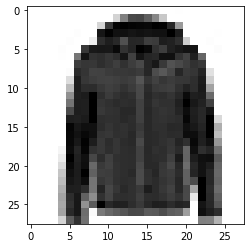

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[source of class_names](https://github.com/zalandoresearch/fashion-mnist)



In [12]:
class_names[y_train[0]]

'Coat'

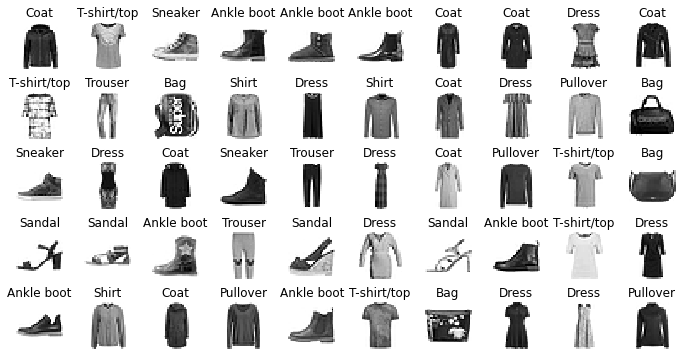

In [13]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

Blueprint of model

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

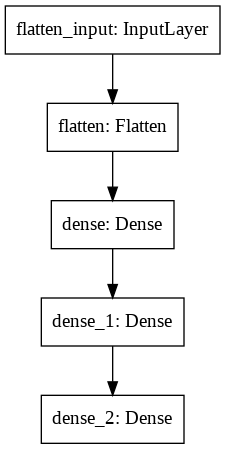

In [15]:
keras.utils.plot_model(model)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [0]:
input_layer=model.layers[0]
hidden_layer1=model.layers[1]
hidden_layer2=model.layers[2]
output_layer=model.layers[3]

In [0]:
weights2,bias2=hidden_layer2.get_weights()

In [20]:
weights2

array([[-0.00155254, -0.12105258, -0.06534276, ...,  0.11972701,
         0.00305072, -0.00756536],
       [ 0.03581426, -0.03463382, -0.07229237, ...,  0.10854184,
        -0.06282042, -0.01142072],
       [-0.09807915,  0.07529036, -0.05297332, ..., -0.01265822,
         0.04321019,  0.02628291],
       ...,
       [ 0.04068492, -0.08063406,  0.04056575, ..., -0.1127248 ,
         0.05338787,  0.07537989],
       [-0.01615641,  0.06037695,  0.01530286, ..., -0.10906225,
        -0.09454841,  0.10174813],
       [ 0.11032974,  0.1149971 , -0.01878694, ...,  0.05037459,
        -0.02806588, -0.10623854]], dtype=float32)

In [0]:
weights2.shape

(300, 100)

In [21]:
bias2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

Building model


In [27]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2225 - accuracy: 0.9201 - val_loss: 0.2996 - val_accuracy: 0.8920
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9216 - val_loss: 0.2967 - val_accuracy: 0.8896
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2153 - accuracy: 0.9230 - val_loss: 0.2937 - val_accuracy: 0.8914
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2124 - accuracy: 0.9239 - val_loss: 0.3011 - val_accuracy: 0.8894
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2083 - accuracy: 0.9258 - val_loss: 0.2940 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2060 - accuracy: 0.9265 - val_loss: 0.2901 - val_accuracy: 0.8920
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2020 - accuracy: 0.9271 - val_loss: 0.3116 - val_accuracy:

In [28]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

(0.0, 1.0)

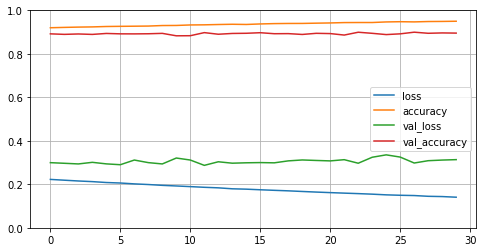

In [29]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,4))
plt.grid(True)
plt.gca().set_ylim(0,1)

Evaluation of model


In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8896


[0.3454113006591797, 0.8895999789237976]